In [172]:
import os,sys,math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
%matplotlib inline
e=math.exp
ln=math.log

plt.style.use("fivethirtyeight")

In [136]:
fluTrain=pd.read_csv('data/FluTrain.csv')
fluTest=pd.read_csv('data/FluTest.csv')



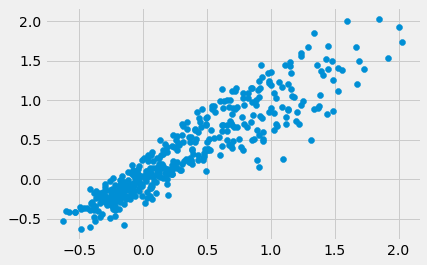

In [184]:
ILILag2=fluTrain['ILI'][:-2]
ILILag2.index=ILILag2.index+2

fluTrain['ILILag2']=ILILag2

plt.scatter(fluTrain['ILI'].apply(lambda x: ln(x)),fluTrain['ILILag2'].apply(lambda x: ln(x)))

In [204]:
df=fluTrain.dropna()
df=sm.add_constant(df)
df['ILILag2']=df['ILILag2'].apply(lambda x: ln(x))
xDf=df[['ILILag2','Queries','const']]

fluTrend2=sm.OLS(df['ILI'].apply(lambda x: ln(x)),xDf).fit()
fluTrend2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ILI   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1993.
Date:                Wed, 14 Feb 2018   Prob (F-statistic):          1.38e-212
Time:                        17:33:33   Log-Likelihood:                 147.24
No. Observations:                 415   AIC:                            -288.5
Df Residuals:                     412   BIC:                            -276.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ILILag2        0.6557      0.023     29.135      0.000       0.611       0.700
Queries        1.2558      0.079     15.876      0.000       1.100       1.411
const         -0.2406      0.020    -12.321      0.000      -0.279      -0.202
==============================================================================
Omnibus:                       74.791   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.402
Skew:                           0.950   Prob(JB):                     2.43e-35
Kurtosis:                       5.368   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
temp=fluTest['ILI']
temp.index=temp.index+2
fluTest['ILILag2']=temp

fluTest['ILILag2'].iloc[0]=fluTrain['ILI'].iloc[-2]
fluTest['ILILag2'].iloc[1]=fluTrain['ILI'].iloc[-1]

xTest=pd.DataFrame({'Queries':fluTest['Queries'],'ILILag2':fluTest['ILILag2'].apply(lambda x: ln(x))})
xTest=sm.add_constant(xTest)
yTest=fluTest[['ILI']]

yPred=model.predict(xTest).apply(lambda x: e(x))

mse(yPred,yTest)*len(


C:\Users\lucasfermo\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


4.5008765910440172